## Importing Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Loading Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data-training.csv')
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [4]:
df.tail(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
2999989,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999990,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,3.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999991,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999992,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999993,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,7.0,12.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999994,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,8.0,11.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999995,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,9.0,10.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999996,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,10.0,9.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999997,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,11.0,8.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999998,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,11.0,8.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999999 entries, 0 to 2999998
Data columns (total 61 columns):
 #   Column     Dtype  
---  ------     -----  
 0   askRate0   float64
 1   askRate1   float64
 2   askRate2   float64
 3   askRate3   float64
 4   askRate4   float64
 5   askRate5   float64
 6   askRate6   float64
 7   askRate7   float64
 8   askRate8   float64
 9   askRate9   float64
 10  askRate10  float64
 11  askRate11  float64
 12  askRate12  float64
 13  askRate13  float64
 14  askRate14  float64
 15  askSize0   float64
 16  askSize1   float64
 17  askSize2   float64
 18  askSize3   float64
 19  askSize4   float64
 20  askSize5   float64
 21  askSize6   float64
 22  askSize7   float64
 23  askSize8   float64
 24  askSize9   float64
 25  askSize10  float64
 26  askSize11  float64
 27  askSize12  float64
 28  askSize13  float64
 29  askSize14  float64
 30  bidRate0   float64
 31  bidRate1   float64
 32  bidRate2   float64
 33  bidRate3   float64
 34  bidRate4   float64

## Feature Engineering

In [6]:
df.isnull().sum()

askRate0       0
askRate1      36
askRate2      64
askRate3      97
askRate4     138
            ... 
bidSize11      0
bidSize12      0
bidSize13      0
bidSize14      0
y              0
Length: 61, dtype: int64

In [7]:
# Drop missing values
#df = df.dropna().reset_index(drop = True)
df = df.fillna(0)
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [8]:
df['y'].unique()

array([-0.5 , -0.25,  0.  , -1.  , -1.25, -0.75, -1.5 ,  0.75,  0.5 ,
        0.25,  1.75,  1.  ,  1.5 ,  1.25,  2.  , -1.75,  2.25, -3.  ,
       -2.  , -2.5 , -2.25,  3.  ,  3.25,  3.5 ,  2.75,  2.5 , -3.5 ,
       -2.75, -3.25, -3.75, -4.  , -4.25, -4.75, -4.5 , -5.  ,  4.75,
        5.  ,  3.75,  4.  ,  4.5 ,  4.25])

In [9]:
df['price'] = df['y'].cumsum()
df.drop(['y'], axis = 1, inplace = True)
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,price
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.0
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.0
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-3.0
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-3.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-4.0
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-4.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-5.0


In [10]:
len(df)

2999999

In [11]:
train_rate = 0.6
val_rate = 0.2
int(len(df)*train_rate)

1799999

In [12]:
df_copy = df.iloc[:1000000].copy(deep = True)

In [13]:
# train, val, test split
df_train = df_copy.iloc[:int(len(df_copy)*train_rate)].copy(deep = True)
df_val = df_copy.iloc[int(len(df_copy)*train_rate):int(len(df_copy)*train_rate) + int(len(df_copy)*val_rate)].copy(deep = True)
df_test = df_copy.iloc[int(len(df_copy)*train_rate) + int(len(df_copy)*val_rate):].copy(deep = True)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(600000, 61)
(200000, 61)
(200000, 61)


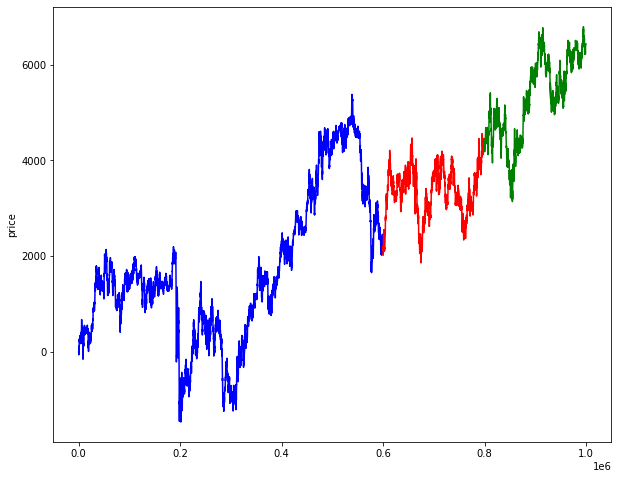

In [14]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_train['price'], color = 'blue')
sns.lineplot(data = df_val['price'], color = 'red' )
sns.lineplot(data = df_test['price'], color = 'green' )

## Making Dataset

In [15]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
train = mx.fit_transform(df_train)
val = mx.transform(df_val)
test = mx.transform(df_test)

In [16]:
# making datasets
def make_dataset(data, lookback):
  X = []
  y = []
  for i in range(lookback, len(data)):
    sample  = data[i - lookback:i,:]
    target = data[i,-1]
    X.append(sample)
    y.append(target)
  X = np.asarray(X)
  y = np.asarray(y)  
  return (X, y)
X_train ,y_train = make_dataset(train, 10)  
X_val ,y_val = make_dataset(val, 10)  
X_test ,y_test = make_dataset(test, 10)  

In [17]:
X_train.shape

(599990, 10, 61)

## Modeling

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(10, 61), return_sequences = True))
model.add(layers.GRU(32))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size= 32, validation_data = (X_val, y_val))

Epoch 1/10
18750/18750 [==============================] - 85s 4ms/step - loss: 0.0018 - val_loss: 3.0835e-04
Epoch 2/10
18750/18750 [==============================] - 82s 4ms/step - loss: 1.1380e-04 - val_loss: 1.0076e-04
Epoch 3/10
18750/18750 [==============================] - 82s 4ms/step - loss: 7.1459e-05 - val_loss: 6.0383e-05
Epoch 4/10
18750/18750 [==============================] - 82s 4ms/step - loss: 5.4210e-05 - val_loss: 2.1259e-04
Epoch 5/10
18750/18750 [==============================] - 81s 4ms/step - loss: 4.5350e-05 - val_loss: 5.3412e-05
Epoch 6/10
18750/18750 [==============================] - 81s 4ms/step - loss: 3.9593e-05 - val_loss: 6.8014e-05
Epoch 7/10
18750/18750 [==============================] - 81s 4ms/step - loss: 3.5078e-05 - val_loss: 1.4126e-04
Epoch 8/10
18750/18750 [==============================] - 81s 4ms/step - loss: 3.1505e-05 - val_loss: 2.1878e-05
Epoch 9/10
18750/18750 [==============================] - 81s 4ms/step - loss: 2.8756e-05 - val_loss

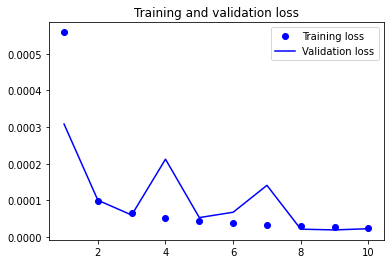

In [19]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
y_train_pred = model.predict(X_train, verbose=1)
y_val_pred = model.predict(X_val, verbose=1)
y_test_pred = model.predict(X_test, verbose=1)

6250/6250 [==============================] - 10s 2ms/step


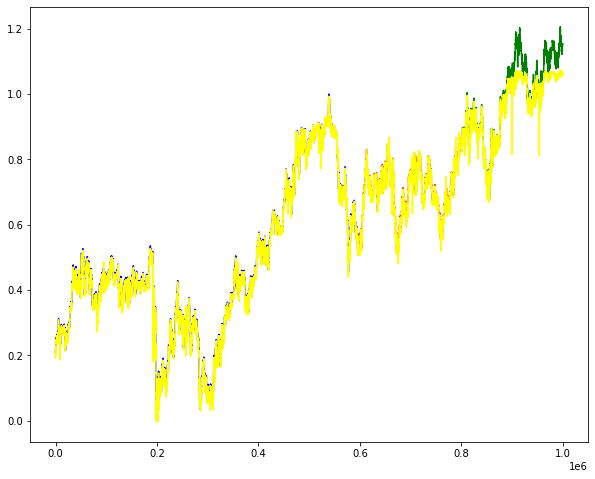

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(y_train.shape[0]), y_train, color = 'blue')
plt.plot(range(y_train.shape[0]), y_train_pred, color = 'yellow')
plt.plot(range(y_train.shape[0],y_train.shape[0]+y_val.shape[0]), y_val, color = 'red')
plt.plot(range(y_train.shape[0],y_train.shape[0]+y_val.shape[0]), y_val_pred, color = 'yellow')
plt.plot(range(y_train.shape[0]+y_val.shape[0], y_train.shape[0]+y_val.shape[0]+y_test.shape[0]), y_test, color = 'green')
plt.plot(range(y_train.shape[0]+y_val.shape[0], y_train.shape[0]+y_val.shape[0]+y_test.shape[0]), y_test_pred, color = 'yellow')

In [22]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.877503558049781
